In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [12]:
df_e = pd.read_csv('final_encoded.csv')
df_we = pd.read_csv('final_df.csv')

In [13]:
y = df_e['price']

In [14]:
df_e = df_e.drop(columns=['price'])
df_we = df_we.drop(columns=['price'])

In [16]:
numeric_features = ['metro_time', 'info_total_area', 'floor_ratio']
X = df_e[numeric_features]

# Добавляем константу для расчета VIF
X_const = add_constant(X)

# Считаем VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Убираем константу из финального вывода
vif_data = vif_data[vif_data['Feature'] != 'const']

print(vif_data)

           Feature       VIF
1       metro_time  1.006551
2  info_total_area  1.007393
3      floor_ratio  1.007787


In [18]:
X = df_e.copy()

# Группируем колонки по группам
groups = {
    'district': [col for col in X.columns if col.startswith('district_')],
    'area': [col for col in X.columns if col.startswith('area_')],
    'rooms': [col for col in X.columns if col.startswith('rooms_')],
    'rent_jkh': [col for col in X.columns if col.startswith('rent_jkh_')],
    'rent_prepayment': [col for col in X.columns if col.startswith('rent_prepayment_')],
    'rent_term': [col for col in X.columns if col.startswith('rent_term_')],
    'rent_living_conditions': [col for col in X.columns if col.startswith('rent_living_conditions_')],
    'year_built_interval': [col for col in X.columns if col.startswith('year_built_interval_')],
    'metro_time': ['metro_time'],
    'info_total_area': ['info_total_area'],
    'floor_ratio': ['floor_ratio']
}

# Результаты VIF
vif_results = []

# Для каждой группы признаков
for group_name, group_features in groups.items():
    # Выбираем фичи вне текущей группы
    other_features = X.columns.difference(group_features)

    for feature in group_features:
        # Целевая переменная — текущая дамми-переменная
        y = X[feature]

        # Регрессоры — все переменные, кроме своих
        X_temp = X[other_features]
        X_temp_const = add_constant(X_temp)

        # Строим модель
        model = LinearRegression().fit(X_temp_const, y)
        y_pred = model.predict(X_temp_const)

        # Считаем R^2
        r_squared = r2_score(y, y_pred)

        # Считаем VIF по формуле
        if r_squared != 1:
            vif = 1 / (1 - r_squared)
        else:
            vif = float('inf')  # Если R^2 == 1, значит идеальная линейная зависимость

        vif_results.append({
            'district': group_name,
            'feature': feature,
            'R_squared': r_squared,
            'VIF': vif
        })

# Собираем всё в DataFrame
vif_df = pd.DataFrame(vif_results)

# Сортируем по убыванию VIF
vif_df = vif_df.sort_values(by='VIF', ascending=False)

In [19]:
vif_df

,district,feature,R_squared,VIF
0,district,district_ВАО,1.000000,inf
1,district,district_ЗАО,1.000000,inf
2,district,district_ЗелАО,1.000000,inf
3,district,district_НАО (Новомосковский),1.000000,inf
4,district,district_САО,1.000000,inf
...,...,...,...,...
42,area,area_просп. Магеллана,0.011668,1.011806
179,area,area_ул. Татьянин Парк,0.011458,1.011591
16,area,area_Завода Мосрентген поселок,0.011189,1.011315
178,area,area_ул. Сальвадора Дали,0.010198,1.010303


In [20]:
df_e = df_e.drop(columns=[col for col in df_e.columns if col.startswith('district_')])

df_e.head()

,metro_time,info_total_area,floor_ratio,last_floor,area_Внуково поселок,area_Внуковское поселение,area_Десеновское поселение,area_Завода Мосрентген поселок,area_Ивановское деревня,area_Кокошкино дп,...,rent_living_conditions_можно с детьми,rent_living_conditions_можно с детьми и животными,rent_living_conditions_можно с животными,"rent_living_conditions_ни с детьми, ни с животными",year_built_interval_1890-1917,year_built_interval_1917-1945,year_built_interval_1945-1970,year_built_interval_1970-1990,year_built_interval_1991-2025,year_built_interval_не попал
0,7.0,73.0,0.683333,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,13.0,68.0,0.522727,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,9.0,40.0,0.333333,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,13.0,60.0,0.375000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,7.0,12.0,0.611111,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
X = df_e.copy()

# Группируем колонки по группам
groups = {
    'area': [col for col in X.columns if col.startswith('area_')],
    'rooms': [col for col in X.columns if col.startswith('rooms_')],
    'rent_jkh': [col for col in X.columns if col.startswith('rent_jkh_')],
    'rent_prepayment': [col for col in X.columns if col.startswith('rent_prepayment_')],
    'rent_term': [col for col in X.columns if col.startswith('rent_term_')],
    'rent_living_conditions': [col for col in X.columns if col.startswith('rent_living_conditions_')],
    'year_built_interval': [col for col in X.columns if col.startswith('year_built_interval_')],
    'metro_time': ['metro_time'],
    'info_total_area': ['info_total_area']
}

# Результаты VIF
vif_results = []

# Для каждой группы признаков
for group_name, group_features in groups.items():
    # Выбираем фичи вне текущей группы
    other_features = X.columns.difference(group_features)

    for feature in group_features:
        # Целевая переменная — текущая дамми-переменная
        y = X[feature]

        # Регрессоры — все переменные, кроме своих
        X_temp = X[other_features]
        X_temp_const = add_constant(X_temp)

        # Строим модель
        model = LinearRegression().fit(X_temp_const, y)
        y_pred = model.predict(X_temp_const)

        # Считаем R^2
        r_squared = r2_score(y, y_pred)

        # Считаем VIF по формуле
        if r_squared != 1:
            vif = 1 / (1 - r_squared)
        else:
            vif = float('inf')  # Если R^2 == 1, значит идеальная линейная зависимость

        vif_results.append({
            'group': group_name,
            'feature': feature,
            'R_squared': r_squared,
            'VIF': vif
        })

# Собираем всё в DataFrame
vif_df = pd.DataFrame(vif_results)

# Сортируем по убыванию VIF
vif_df = vif_df.sort_values(by='VIF', ascending=False)

In [23]:
vif_df

,group,feature,R_squared,VIF
197,info_total_area,info_total_area,0.739077,3.832553
178,rooms,rooms_студия,0.497269,1.989134
193,year_built_interval,year_built_interval_1970-1990,0.427260,1.745992
176,rooms,rooms_3,0.394811,1.652377
194,year_built_interval,year_built_interval_1991-2025,0.370563,1.588721
...,...,...,...,...
161,area,area_ул. Лобановский Лес,0.005883,1.005918
40,area,area_р-н Бескудниковский,0.005491,1.005522
29,area,area_просп. Магеллана,0.005070,1.005096
107,area,area_р-н Печатники,0.004431,1.004450


In [24]:
X_encoded = df_e.copy()

# Обновляем groups (без okrug)
groups = {
    key: [col for col in cols if col in X_encoded.columns]
    for key, cols in groups.items()
    if key != 'okrug'  # полностью исключаем группу okrug
}

# Дальше твой код без изменений
model_full = LinearRegression()
model_full.fit(X_encoded, y)
coef_full = model_full.coef_

tolerance = 0.1
results = []

for group_name, group_features in groups.items():
    X_reduced = X_encoded.drop(columns=group_features)

    model_reduced = LinearRegression()
    model_reduced.fit(X_reduced, y)

    common_features = X_reduced.columns
    coef_reduced = model_reduced.coef_

    coef_diff = np.zeros(len(coef_full))
    for idx, feature in enumerate(X_encoded.columns):
        if feature in common_features:
            coef_diff[idx] = abs(coef_full[idx] - coef_reduced[list(common_features).index(feature)])
        else:
            coef_diff[idx] = 0

    max_change = coef_diff.max()
    mean_change = coef_diff.mean()
    num_significant_changes = (coef_diff > tolerance).sum()
    most_affected_feature = X_encoded.columns[np.argmax(coef_diff)]

    results.append({
        'group': group_name,
        'max_change': max_change,
        'mean_change': mean_change,
        'num_significant_changes': num_significant_changes,
        'most_affected_feature': most_affected_feature
    })

results_df = pd.DataFrame(results)
print(results_df)

                    group    max_change   mean_change  \
0                    area  5.328241e-15  1.366820e-16   
1                   rooms  2.124169e-15  2.571840e-16   
2                rent_jkh  3.413611e-15  3.843749e-16   
3         rent_prepayment  2.953692e-15  4.193972e-16   
4               rent_term  5.150069e-15  6.009611e-16   
5  rent_living_conditions  2.072439e-15  4.032867e-16   
6     year_built_interval  1.184687e-15  2.122394e-16   
7              metro_time  9.063658e-14  2.056138e-15   
8         info_total_area  4.238963e+01  3.962876e+00   

   num_significant_changes            most_affected_feature  
0                        0                          rooms_3  
1                        0      area_просп. Нововатутинский  
2                        0   area_Новофедоровское поселение  
3                        0   area_Новофедоровское поселение  
4                        0   area_Новофедоровское поселение  
5                        0      area_ул. Генерала Пилипен

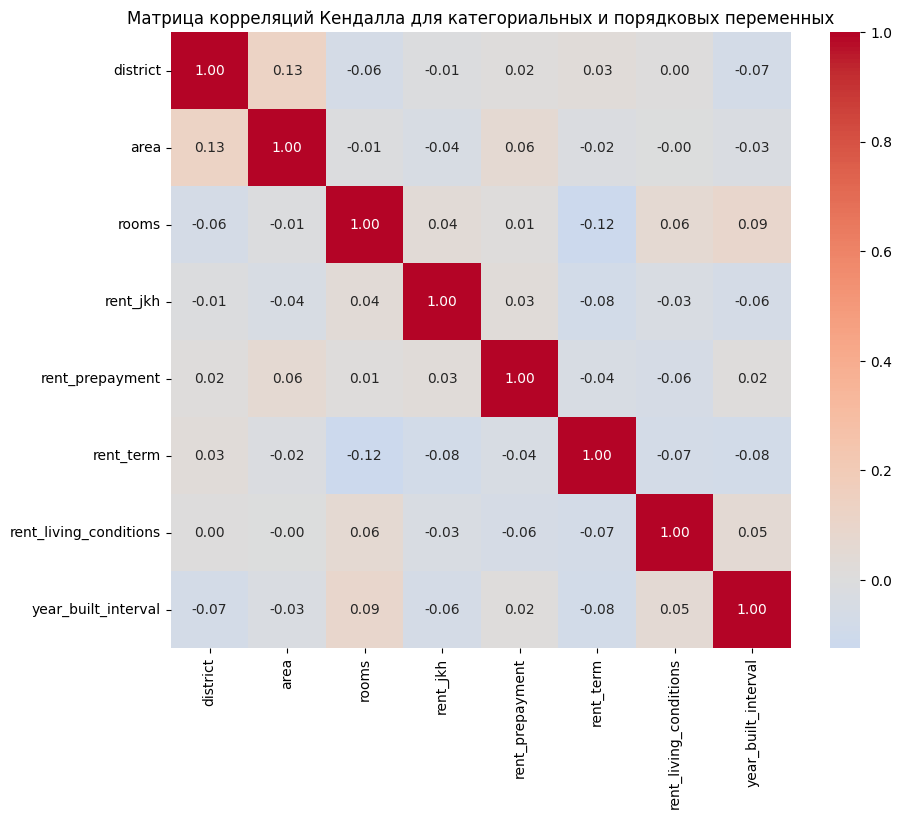

In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_ordinal_vars = [
    'district',
    'area',
    'rooms',
    'rent_jkh',
    'rent_prepayment',
    'rent_term',
    'rent_living_conditions',
    'year_built_interval'
]

# Сначала копируем данные
df_encoded = df_we[categorical_ordinal_vars].copy()

# Преобразуем все категории в числа
label_encoders = {}
for col in categorical_ordinal_vars:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # если потом понадобится обратно декодировать

# Считаем корреляцию Кендалла
kendall_corr = df_encoded.corr(method='kendall')

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Матрица корреляций Кендалла для категориальных и порядковых переменных')
plt.show()
